<a href="https://colab.research.google.com/github/byshadowoz/Movies_Data_Visualization/blob/main/processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# All data is taken from a kaggle.com dataset that takes data from tmdb.
### Link of the dataset on the description zone in repository

In [57]:
#unzip archive.zip

In [58]:
#!pip install matplotlib

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('CSVs/movie_dataset.csv', index_col=0)

In [61]:
df.info() #23 columns

<class 'pandas.core.frame.DataFrame'>
Index: 1034999 entries, 27205 to 1286779
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   title                 1034987 non-null  object 
 1   vote_average          1034999 non-null  float64
 2   vote_count            1034999 non-null  int64  
 3   status                1034999 non-null  object 
 4   release_date          903322 non-null   object 
 5   revenue               1034999 non-null  int64  
 6   runtime               1034999 non-null  int64  
 7   adult                 1034999 non-null  bool   
 8   backdrop_path         287519 non-null   object 
 9   budget                1034999 non-null  int64  
 10  homepage              111939 non-null   object 
 11  imdb_id               579730 non-null   object 
 12  original_language     1034999 non-null  object 
 13  original_title        1034987 non-null  object 
 14  overview              843934 non-nu

In [62]:
df = df.drop(columns=['backdrop_path','poster_path','imdb_id','homepage'])

In [63]:

df.info() #18 columns

<class 'pandas.core.frame.DataFrame'>
Index: 1034999 entries, 27205 to 1286779
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   title                 1034987 non-null  object 
 1   vote_average          1034999 non-null  float64
 2   vote_count            1034999 non-null  int64  
 3   status                1034999 non-null  object 
 4   release_date          903322 non-null   object 
 5   revenue               1034999 non-null  int64  
 6   runtime               1034999 non-null  int64  
 7   adult                 1034999 non-null  bool   
 8   budget                1034999 non-null  int64  
 9   original_language     1034999 non-null  object 
 10  original_title        1034987 non-null  object 
 11  overview              843934 non-null   object 
 12  popularity            1034999 non-null  float64
 13  tagline               147785 non-null   object 
 14  genres                645131 non-nu

In [64]:
mask = df['budget'] < 100000
df = df.drop(df[mask].index)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20253 entries, 27205 to 683007
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 20253 non-null  object 
 1   vote_average          20253 non-null  float64
 2   vote_count            20253 non-null  int64  
 3   status                20253 non-null  object 
 4   release_date          19431 non-null  object 
 5   revenue               20253 non-null  int64  
 6   runtime               20253 non-null  int64  
 7   adult                 20253 non-null  bool   
 8   budget                20253 non-null  int64  
 9   original_language     20253 non-null  object 
 10  original_title        20253 non-null  object 
 11  overview              19733 non-null  object 
 12  popularity            20253 non-null  float64
 13  tagline               12789 non-null  object 
 14  genres                19497 non-null  object 
 15  production_companie

In [66]:
mask2 = df.isnull().any(axis=1)
df = df.drop(df[mask2].index)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10337 entries, 27205 to 694772
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 10337 non-null  object 
 1   vote_average          10337 non-null  float64
 2   vote_count            10337 non-null  int64  
 3   status                10337 non-null  object 
 4   release_date          10337 non-null  object 
 5   revenue               10337 non-null  int64  
 6   runtime               10337 non-null  int64  
 7   adult                 10337 non-null  bool   
 8   budget                10337 non-null  int64  
 9   original_language     10337 non-null  object 
 10  original_title        10337 non-null  object 
 11  overview              10337 non-null  object 
 12  popularity            10337 non-null  float64
 13  tagline               10337 non-null  object 
 14  genres                10337 non-null  object 
 15  production_companie

In [68]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [69]:
df['production_companies'].unique()

array(['Legendary Pictures, Syncopy, Warner Bros. Pictures',
       'Legendary Pictures, Syncopy, Lynda Obst Productions',
       'DC Comics, Legendary Pictures, Syncopy, Isobel Griffiths, Warner Bros. Pictures',
       ..., 'Making Movies', 'AFP', 'Found Object, WETA'], dtype=object)

In [70]:
mask = df[['production_companies', 'title', 'revenue', 'release_date','budget']]

In [71]:
df3 = pd.DataFrame(mask)

In [72]:
df3

,production_companies,title,revenue,release_date,budget
id,,,,,
27205,"Legendary Pictures, Syncopy, Warner Bros. Pict...",Inception,825532764,2010-07-15,160000000
157336,"Legendary Pictures, Syncopy, Lynda Obst Produc...",Interstellar,701729206,2014-11-05,165000000
155,"DC Comics, Legendary Pictures, Syncopy, Isobel...",The Dark Knight,1004558444,2008-07-16,185000000
19995,"Dune Entertainment, Lightstorm Entertainment, ...",Avatar,2923706026,2009-12-15,237000000
24428,Marvel Studios,The Avengers,1518815515,2012-04-25,220000000
...,...,...,...,...,...
716283,Sunrayz International Films,Crack House of the Dead,0,2021-06-18,175000
674929,"Firma Films, Kan, United King Films",Douze Points,0,2019-05-19,1300000
674599,Making Movies,Siblings,0,2023-10-27,1427000


In [73]:
mask2 = df3['revenue'] <= 0

In [74]:
df3 = df3.drop(df3[mask2].index)

In [75]:
df3

,production_companies,title,revenue,release_date,budget
id,,,,,
27205,"Legendary Pictures, Syncopy, Warner Bros. Pict...",Inception,825532764,2010-07-15,160000000
157336,"Legendary Pictures, Syncopy, Lynda Obst Produc...",Interstellar,701729206,2014-11-05,165000000
155,"DC Comics, Legendary Pictures, Syncopy, Isobel...",The Dark Knight,1004558444,2008-07-16,185000000
19995,"Dune Entertainment, Lightstorm Entertainment, ...",Avatar,2923706026,2009-12-15,237000000
24428,Marvel Studios,The Avengers,1518815515,2012-04-25,220000000
...,...,...,...,...,...
784837,"Canal Sur, Teyso Media Ficción",La banda en la isla de la magia,32000,2008-12-19,731000
773862,Gabinete Films,Your Parents Will Come Back,20698,2015-04-04,293000
761273,88 Rising,Joji Presents: THE EXTRAVAGANZA,1000000,2020-10-23,100000


# **What is the largest budget in a movie in each year?**

In [76]:
result = df3.groupby(df['release_date'].dt.year)['budget'].idxmax()
year = df3.loc[result]

In [77]:
year

,production_companies,title,revenue,release_date,budget
id,,,,,
618,Epoch Film Co.,The Birth of a Nation,11000000,1915-02-08,100000
3059,"Triangle Film Corporation, Wark Producing Corp.",Intolerance: Love's Struggle Throughout the Ages,1750000,1916-09-04,385907
54242,Mabel Normand Feature Film Company,Mickey,8000000,1918-08-01,250000
278093,"Paramount, Mayflower Photoplay Company",The Miracle Man,3600000,1919-08-26,120000
563505,Fox Film Corporation,Over the Hill to the Poorhouse,3000000,1920-09-17,100000
...,...,...,...,...,...
299534,Marvel Studios,Avengers: Endgame,2800000000,2019-04-24,356000000
577922,"Warner Bros. Pictures, Syncopy",Tenet,365304105,2020-08-22,205000000
370172,"Eon Productions, Metro-Goldwyn-Mayer, Universa...",No Time to Die,774153007,2021-09-29,250000000


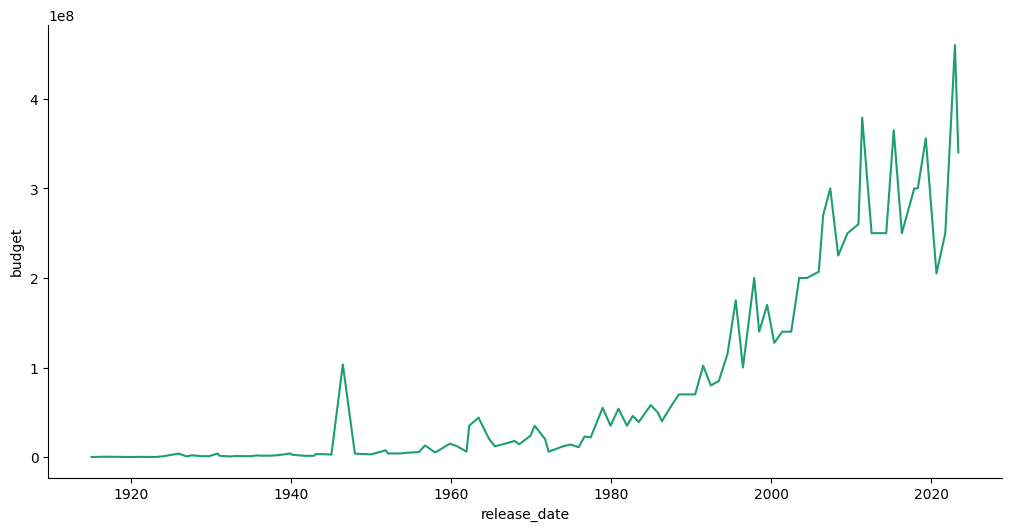

In [78]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['release_date']
  ys = series['budget']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = year.sort_values('release_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('release_date')
_ = plt.ylabel('budget')

In [79]:
df3['profit'] = df['revenue'] - df['budget']
df3['box_Office_Success'] = df3['revenue'] >= 2.5 * df3['budget']

# **What is the largest revenue and profit in a movie in each year?, it is a Box Oficce success?**

In [80]:
result = df3.groupby(df['release_date'].dt.year)['revenue'].idxmax()
year = df3.loc[result]

In [81]:
year

,production_companies,title,revenue,release_date,budget,profit,box_Office_Success
id,,,,,,,
618,Epoch Film Co.,The Birth of a Nation,11000000,1915-02-08,100000,10900000,True
30266,The Universal Film Mfg. Co.,"20,000 Leagues Under the Sea",8000000,1916-12-24,200000,7800000,True
54242,Mabel Normand Feature Film Company,Mickey,8000000,1918-08-01,250000,7750000,True
278093,"Paramount, Mayflower Photoplay Company",The Miracle Man,3600000,1919-08-26,120000,3480000,True
563505,Fox Film Corporation,Over the Hill to the Poorhouse,3000000,1920-09-17,100000,2900000,True
...,...,...,...,...,...,...,...
299534,Marvel Studios,Avengers: Endgame,2800000000,2019-04-24,356000000,2444000000,True
635302,"ufotable, Aniplex, Shueisha, TOHO",Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,503063688,2020-10-16,15800000,487263688,True
634649,"Marvel Studios, Pascal Pictures, Columbia Pict...",Spider-Man: No Way Home,1921847111,2021-12-15,200000000,1721847111,True


In [82]:
df3

,production_companies,title,revenue,release_date,budget,profit,box_Office_Success
id,,,,,,,
27205,"Legendary Pictures, Syncopy, Warner Bros. Pict...",Inception,825532764,2010-07-15,160000000,665532764,True
157336,"Legendary Pictures, Syncopy, Lynda Obst Produc...",Interstellar,701729206,2014-11-05,165000000,536729206,True
155,"DC Comics, Legendary Pictures, Syncopy, Isobel...",The Dark Knight,1004558444,2008-07-16,185000000,819558444,True
19995,"Dune Entertainment, Lightstorm Entertainment, ...",Avatar,2923706026,2009-12-15,237000000,2686706026,True
24428,Marvel Studios,The Avengers,1518815515,2012-04-25,220000000,1298815515,True
...,...,...,...,...,...,...,...
784837,"Canal Sur, Teyso Media Ficción",La banda en la isla de la magia,32000,2008-12-19,731000,-699000,False
773862,Gabinete Films,Your Parents Will Come Back,20698,2015-04-04,293000,-272302,False
761273,88 Rising,Joji Presents: THE EXTRAVAGANZA,1000000,2020-10-23,100000,900000,True


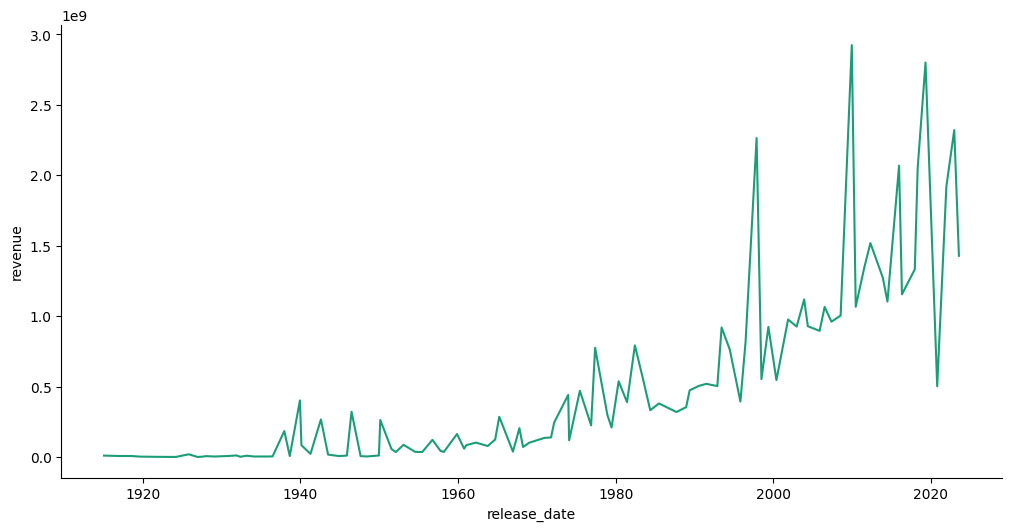

In [83]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['release_date']
  ys = series['revenue']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = year.sort_values('release_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('release_date')
_ = plt.ylabel('revenue')

In [84]:
df3

,production_companies,title,revenue,release_date,budget,profit,box_Office_Success
id,,,,,,,
27205,"Legendary Pictures, Syncopy, Warner Bros. Pict...",Inception,825532764,2010-07-15,160000000,665532764,True
157336,"Legendary Pictures, Syncopy, Lynda Obst Produc...",Interstellar,701729206,2014-11-05,165000000,536729206,True
155,"DC Comics, Legendary Pictures, Syncopy, Isobel...",The Dark Knight,1004558444,2008-07-16,185000000,819558444,True
19995,"Dune Entertainment, Lightstorm Entertainment, ...",Avatar,2923706026,2009-12-15,237000000,2686706026,True
24428,Marvel Studios,The Avengers,1518815515,2012-04-25,220000000,1298815515,True
...,...,...,...,...,...,...,...
784837,"Canal Sur, Teyso Media Ficción",La banda en la isla de la magia,32000,2008-12-19,731000,-699000,False
773862,Gabinete Films,Your Parents Will Come Back,20698,2015-04-04,293000,-272302,False
761273,88 Rising,Joji Presents: THE EXTRAVAGANZA,1000000,2020-10-23,100000,900000,True


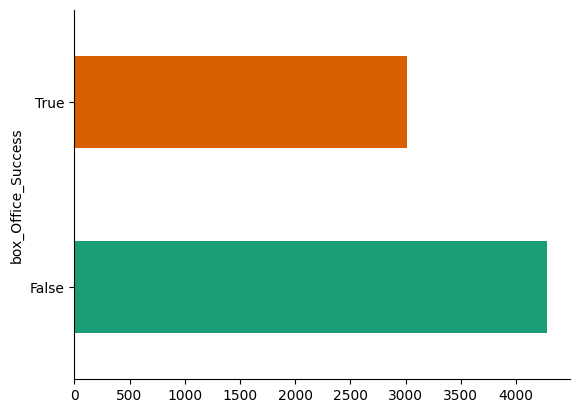

In [85]:
import seaborn as sns
df3.groupby('box_Office_Success').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Who's the top 10 movies most popular in the time?**

In [86]:
df_P = df.copy()
df_P = df_P.drop(columns=(['status','runtime','adult','original_language','overview','tagline','production_countries','spoken_languages','keywords']))

In [87]:
df_P['popularity_score'] = (df_P['popularity'] * df_P['vote_count'] * df_P['vote_average']) // 3
top10 = df_P.sort_values('popularity_score', ascending=False)
top10.head(10)


,title,vote_average,vote_count,release_date,revenue,budget,original_title,popularity,genres,production_companies,popularity_score
id,,,,,,,,,,,
346698,Barbie,7.279,5074,2023-07-19,1428545028,145000000,Barbie,1069.340,"Comedy, Adventure, Fantasy","LuckyChap Entertainment, Heyday Films, NB/GG P...",13164875.0
157336,Interstellar,8.417,32571,2014-11-05,701729206,165000000,Interstellar,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...",12815695.0
671,Harry Potter and the Philosopher's Stone,7.916,25379,2001-11-16,976475550,125000000,Harry Potter and the Philosopher's Stone,185.482,"Adventure, Fantasy","Warner Bros. Pictures, Heyday Films, 1492 Pict...",12421121.0
299536,Avengers: Infinity War,8.255,27713,2018-04-25,2052415039,300000000,Avengers: Infinity War,154.340,"Adventure, Action, Science Fiction",Marvel Studios,11769495.0
155,The Dark Knight,8.512,30619,2008-07-16,1004558444,185000000,The Dark Knight,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...",11349781.0
385687,Fast X,7.265,3881,2023-05-17,704709660,340000000,Fast X,1175.267,"Action, Crime, Thriller","Universal Pictures, Original Film, One Race, P...",11045733.0
634649,Spider-Man: No Way Home,7.990,18299,2021-12-15,1921847111,200000000,Spider-Man: No Way Home,186.065,"Action, Adventure, Science Fiction","Marvel Studios, Pascal Pictures, Columbia Pict...",9068126.0
278,The Shawshank Redemption,8.702,24649,1994-09-23,28341469,25000000,The Shawshank Redemption,122.610,"Drama, Crime",Castle Rock Entertainment,8766435.0
238,The Godfather,8.707,18677,1972-03-14,245066411,6000000,The Godfather,158.448,"Drama, Crime","Paramount, Alfran Productions",8588971.0


# **How many movies did make each movie companies?**

In [ ]:
dfproduct = df.production_companies

In [ ]:
def transform_values(df):
  i = 0
  super_arr = []
  unique = []
  while i < len(df):
    values = df[i].split(", ")
    super_arr.extend(values)
    i += 1
  return super_arr

In [ ]:
dfproduct =transform_values(dfproduct)
dfproduct = list(set(dfproduct))

In [ ]:
for company in dfproduct:
    df[company] = df['production_companies'].apply(lambda x: int(company in x))

In [ ]:
company_counts = df[dfproduct].sum()
company_counts = company_counts.sort_values(ascending=False)

In [ ]:
company_counts.head(10)

# **What are the most popular movie in each companie?**

In [ ]:
df['popularity_score'] = df['popularity'] * df['vote_average'] * df['vote_count'] // 3

In [ ]:
for company in dfproduct:
  df_company = df[df[company] == 1]

  mostP_movie = df_company['popularity_score'].idxmax()
  print(f"the most pupular movie of {company} is: {df_company.loc[mostP_movie, 'title']}")

# **What is the most popular movie genre?**

In [ ]:
def count_genres(df, columns_genre):
    genres_desc = df[columns_genre].str.split(', ').explode()

    count_genres = genres_desc.value_counts()

    return count_genres

In [ ]:
mostpop_genres = count_genres(df, 'genres')

In [ ]:
mostpop_genres

# **What is the most popular movie genre in each year?**

In [ ]:
dfyear = df.copy()

In [ ]:
dfyear['release_year'] = pd.DatetimeIndex(dfyear['release_date']).year
dfyear = dfyear.sort_values(by='release_year')
dfyear

In [ ]:
mostpop_genres_in_year = dfyear.groupby('release_year')['genres'].apply(count_genres).unstack()
mostpop_genres_in_year = mostpop_genres_in_year.sort_values(by=dfyear['release_year'].unique()[::-1], ascending=False)
mostpop_genres_in_year.head(10)